<center><h3>Abstract</h3></center><br>
This report will discuss about simulation of tubelight in python using a basic 1-Dimensional model of tubelight.It analyses the electron density , Emission Light intensity and the electron phase space as function of length of the tubelight and discusses the effect of changing the gas inside the tubelight which is done by changing the threshold velocity and probability that ioniztion occur and observe their plots.

# Introduction
* We use a 1-Dimensional model of the tubelight for simulating in python.
* We create a simulation universe. The tube is divided into n sections. 
* In each time instant, M electrons are injected. We run the simulation for nk turns. The electrons are unable to excite the atoms till they have a velocity of u0. 
* Beyond this velocity, there is a probability p in each turn that a collision will occur and an atom excited.
* Note that the electron’s velocity reduces to zero if it collides.
* Assumptions made while creating this simulation universe are as follows:
  * Uniform electric field is present, that accelerates electrons. 
  * Electrons are emitted by the cathode with zero energy, and accelerate in this field with a = 1
  * In our model, we will assume that the relaxation is immediate. The electron loses all its energy and the process        starts again.
  * Electrons reaching the anode are absorbed and lost. Each “time step”, an average of N electrons are introduced at the cathode. 
* The actual number of electrons is determined by finding the integer part of a random number that is “normally distributed” with standard deviation of 2 and mean 5.
* Our Aim is to plot the light intensity as a function of position after the process has reached steady state.
* And we try to understand the “dark spaces” and we will try to find them in our simulation.


# Python Code : 
## Import the Libraries

In [2]:
# load libraries and set plot parameters
from pylab import *
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
import sys
from  tabulate import tabulate


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

## Part B:
* To get user update of the parameters of the tubelight model using sys.argv.
* The program takes 6 arguments.
* The arguments for this simulation are as follows:
     * The arguments must be given in this order when the program is run in command line
     *  n     $\to$   spatial grid size (No of sections in which length of tubelight is divided)
     *  M     $\to$   number of electrons injected per turn. 
     *  Msig  $\to$   Standard deviation of injected electrons
     *  nk    $\to$   number of turns to simulate (time for which the simulation is running)
     *  u0    $\to$   threshold velocity.(Velocity after which ionization can happen)
     *  p     $\to$   probability that ionization will occur


In [3]:
# To get the arguments using sys.argv from command line
if(len(sys.argv)==7):
    n,M,Msig,nk,u0,p = sys.argv[1:]
else:
    n=100                   # spatial grid size.
    M=5                     # number of electrons injected per turn.
    Msig = 2                #Standard deviation of injected electrons
    nk=500                  # number of turns to simulate.
    u0=7                    # threshold velocity.
    p=0.5                  # probability that ionization will occur

n=int(n)                   
M=int(M)                   
Msig =int(Msig)               
nk=int(nk)           
u0=int(u0)               
p=float(p)     

## Part C:
* Create vectors to hold the electron information. The dimension should be nM (Because in the worst case per turn each section of tubelight could have M electrons,and there totally n sections ,so totally nM).
    * So the following arrays are declared with nM size to avoid Out of memory error.
    * Electron position xx
    * Electron velocity u
    * Displacement in current turn dx
    * To Create them initially with zeros in them.
* Now ,we want to accumulate all the position,velocity and Intensity of existing electrons for all turns (nk)
    * Intensity of emitted light, I
    * Electron position, X
    * Electron velocity, V
    * When collision takes place,We record that as emitted light in I,but we do not know the length of these arrays.Since collision happens randomly. So we create them as lists and extend them as required. 

In [4]:
#Initialsing all these arrays with zeros with size nM
N = n*M
xx = np.zeros(N)
u = np.zeros(N)
dx = np.zeros(N)

# Declare intensity and electron position and velocity 
I = []
X = []
V = []

## Part D:
* To run the simulation for nk turns using forloop and corresponding functions given below to update the positions and velocities and Intensity of electrons after each turn.
* Equations used for updating the position and velocities of electrons are given below:
* Assumptions made are: 
    * a = 1 and $\Delta t$ = 1

\begin{equation}
  dx_i = u_i\Delta t + \frac{1}{2}a(\Delta)^{2} = u_i + 0.5
  \end{equation}
  
 \begin{equation}
 x_i \leftarrow x_i + dx_i
  \end{equation} 
  
\begin{equation}
 u_i \leftarrow u_i + 1
  \end{equation} 
  
 \begin{equation}
 x_i \leftarrow x_i - dx\rho
  \end{equation} 

* Here r is a random number between 0 and 1.

In [5]:
# Function to find the electrons inside the tubelight
def findexistElectrons(xx):
    #ii is a vector containing the indices of vector xx 
    #that have positive entries.
    ii = where(xx>0)
    return ii[0]    

In [6]:
# function to upate the Velocity,Displacement,position of electrons to zero
# of electrons which hit anode i.e its position > n(Outside tubelight)
def updatePosVel(xx,u,dx):
    indexes = where(xx>n)
    xx[indexes] = 0
    u[indexes] = 0
    dx[indexes] = 0
    return xx,u,dx

In [7]:
# function to find the energetic electrons inside tubelight
# by checking its velocity is more than threshold and returns the indices
# of those electrons
def findEnergeticElectrons(u):
    kk = where(u >= u0)[0]
    ll = where(rand(len(kk))<=p)
    kl = kk[ll]
    return kl

In [8]:
# function to inject electrons by finding out indexes of electrons 
# whose position is less than 0 .
def toInjectElectron(xx,m):
    inj = where(xx <= 0)
    return inj

In [9]:
# For loop to run the simulation nk times
for j in range(1,nk):

    ii = findexistElectrons(xx)    #to find electrons inside tubelight
    X.extend(xx[ii].tolist())      #Storing active electrons in X each turn
    V.extend(u[ii].tolist())       #Storing velocities of these electrons

    dx[ii] = u[ii] + 0.5             #displacement of electron from kinematics
    xx[ii] = xx[ii] + dx[ii]         #updating position by adding the displacement
    u[ii]  = u[ii] + 1               #updating the velocity at new position
    xx,u,dx = updatePosVel(xx,u,dx)  #update position,velocity of electrons which hit anode
    kl = findEnergeticElectrons(u)   #indexes of energetic electrons
    u[kl] = 0                        #set velocity of energetic electrons to zero
    xx[kl] = xx[kl]-dx[kl]*random(len(kl))  #updating position after collision
    
    I.extend(xx[kl].tolist())            #Storing ionized electrons positions
    m=int(randn()*Msig+M)                #Actual no of injected electrons
    inj = toInjectElectron(xx,m)         #indexes where to inject electrons
    xx[inj] = 1                          #Set their position with 1

## Part E:
* To plot three graphs:
  * Histogram of Electron density
  * Histogram of Emission Intensity
  * Electron phase space plot
* And to analyse the graphs obtained

In [10]:
print(n)

100


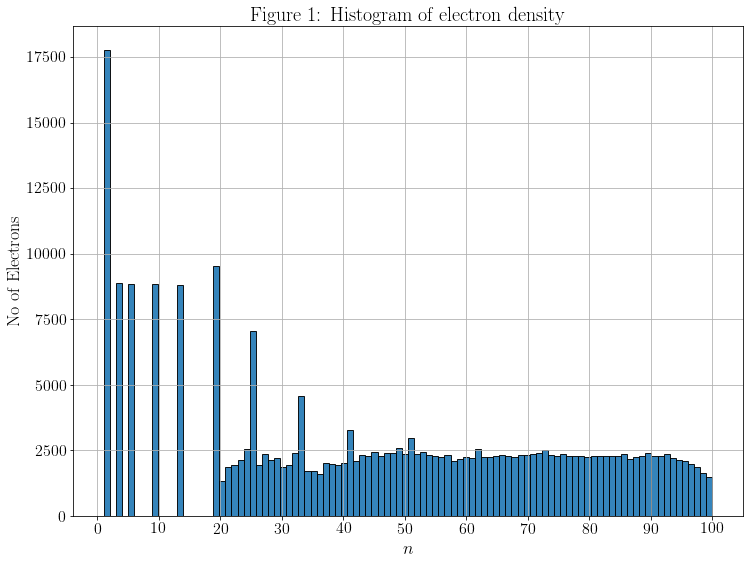

In [11]:
fig1 = figure()
ax1 = fig1.add_subplot(111)
ax1.hist(X,n, alpha=0.9, histtype='bar', ec='black')
ax1.legend()
xticks(range(0,n+1,10))
title(r"Figure 1: Histogram of electron density")
xlabel("$n$")
ylabel("No of Electrons")
grid()
savefig("Figure1.jpg")

### Results and Discussion:
* From the plot,we observe that it electron density decreases with length of the tubelight

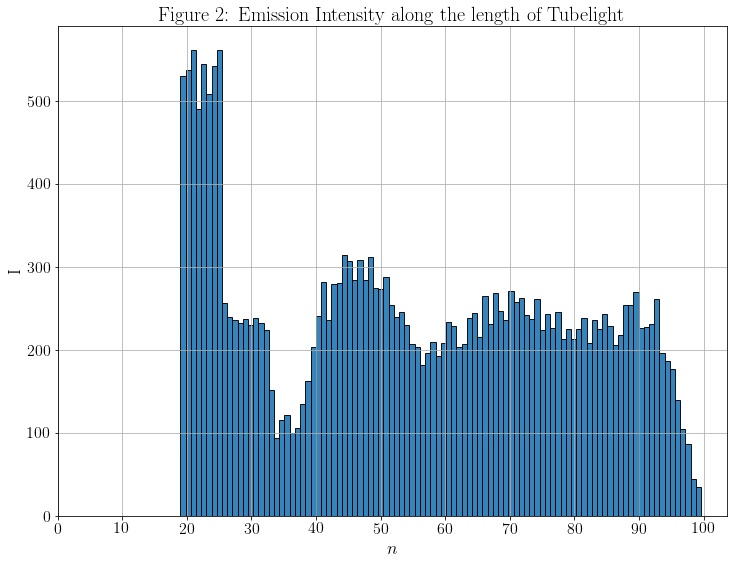

In [12]:
fig2 = figure()
ax2 = fig2.add_subplot(111)
Idata = ax2.hist(I,n,alpha=0.9, histtype='bar', ec='black')
ax2.legend()
xticks(range(0,n+1,10))
title(r"Figure 2: Emission Intensity along the length of Tubelight")
xlabel("$n$")
ylabel("I")
grid()
savefig("Figure2.jpg")

### Results and Discussion:
* From the plot of Emission intensity we observe that the region upto 10 is where electrons are building up their energy. Beyond that is a region where the emission decays, representing the fewer energetic electrons that reached there before colliding. At the next peak.But this is a diffuse peak since the zero energy location of different electrons is different.

In [17]:
o = linspace(0,10,101)
print(o)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


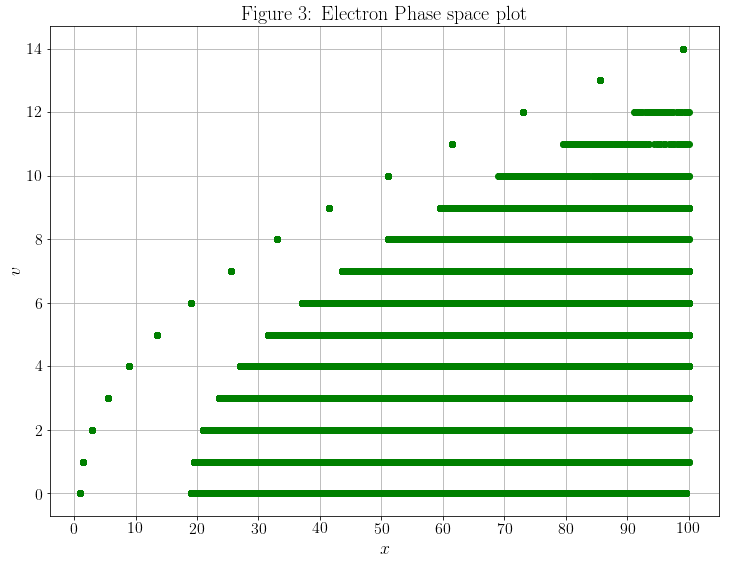

In [13]:
fig3 = figure()
ax3 = fig3.add_subplot(111)
ax3.plot(X,V,'go')
ax3.legend()
title(r"Figure 3: Electron Phase space plot")
xlabel("$x$")
xticks(range(0,n+1,10))
ylabel("$v$")
grid()
savefig("Figure3.jpg")

### Results and Discussion:
* From the plot of electron phase space we observe that it follows a velocity varies parabolically with  increase in length of the tubelight i.e position of electrons.

## Part F:
* To print the table of Intensity as a function of position of electrons in the tubelight
* The intensity data is obtained from histogram function which returns a tuple consisting of Intensity array,bins.
* The second output of tuple from hist function actually gives the dividing positions between bins, and so has a dimension one greater than the population array. 
* Convert to mid point values by:  

\begin{equation}
xpos=0.5(bins[0:-1]+bins[1:])
   \end{equation}
   
* This averages the vector containing left positions of all the bins and the vector containing the right positions of all the bins.

In [14]:
bins = Idata[1]
xpos =0.5*(bins[0:-1]+bins[1:])

table = zip(xpos,Idata[0])

headers = ["Position","Count"]
#tabulating Intensity of electrons Vs position inside the tubelight
print("Intensity data:")
print(tabulate(table,tablefmt="fancy_grid",headers=headers))

Intensity data:
╒════════════╤═════════╕
│   Position │   Count │
╞════════════╪═════════╡
│    19.4051 │     530 │
├────────────┼─────────┤
│    20.211  │     538 │
├────────────┼─────────┤
│    21.0169 │     562 │
├────────────┼─────────┤
│    21.8229 │     491 │
├────────────┼─────────┤
│    22.6288 │     545 │
├────────────┼─────────┤
│    23.4347 │     509 │
├────────────┼─────────┤
│    24.2406 │     542 │
├────────────┼─────────┤
│    25.0466 │     562 │
├────────────┼─────────┤
│    25.8525 │     256 │
├────────────┼─────────┤
│    26.6584 │     240 │
├────────────┼─────────┤
│    27.4643 │     236 │
├────────────┼─────────┤
│    28.2703 │     233 │
├────────────┼─────────┤
│    29.0762 │     237 │
├────────────┼─────────┤
│    29.8821 │     230 │
├────────────┼─────────┤
│    30.688  │     239 │
├────────────┼─────────┤
│    31.4939 │     232 │
├────────────┼─────────┤
│    32.2999 │     224 │
├────────────┼─────────┤
│    33.1058 │     152 │
├────────────┼─────────┤
│    33.9

## Results and Discussion:
* As we increase u0 and p that is threshold velocity and probability of ionization peak intensity will increase and the position at which the peak occurs also increased and velocity at that point also increases according to plot and equations we obtained.